#  Проект: увеличение выручки интернет-магазина

Для крупного интернет-магазина подготовлен список гипотез для увеличения выручки.
Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.


## Приоритизация гипотез

In [1]:
import pandas as pd
from scipy import stats as st
import scipy.stats as stats
import numpy as np
import math as mth
import datetime as dt
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings

data = pd.read_csv('/datasets/hypothesis.csv')

In [2]:
#data.head(10)
#прочитаем файл с гипотезами и приоретизируем их параметры цветом
import seaborn as sns
cm = sns.light_palette("blue", as_cmap=True)
data.style.background_gradient(cmap=cm)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


В файле /datasets/hypothesis.csv содержится 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Reach — скольких пользователей затронет изменение;

Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;

Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так;

Efforts — сколько стоит протестировать эту гипотезу.

Все параметры оценены по шкале от 1 до 10.

In [3]:
data.columns = data.columns.str.lower()

In [4]:
#Применим фреймворк ICE для приоритизации гипотез

data['ICE'] = data['impact'] * data['confidence'] / data['efforts']
display(data[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_colwidth', 200)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


In [5]:
#Применим фреймворк RICE для приоритизации гипотез
data['RICE'] = data['reach'] * data['impact'] * data['confidence'] / data['efforts']
display(data[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))
pd.set_option('display.max_colwidth', 200)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.00


In [6]:
#посмотрим на изменения, собрав все данные в одной таблице
data_hypothesis = data[['hypothesis', 'ICE', 'RICE']].sort_values(by='RICE', ascending=False)

data_hypothesis.style.background_gradient(cmap=cm)


,hypothesis,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2,112
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7,56
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3333,40
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8,40
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125,9
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,4
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33333,4
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1,3


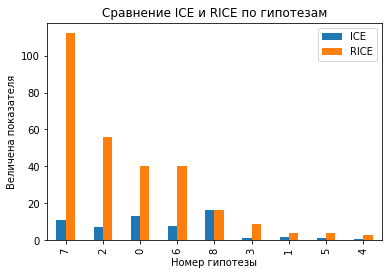

In [7]:
#построим графики приоретизации гипотез для ICE и RICE
x = np.arange(9)
data_hypothesis.plot(kind='bar')
plt.title('Сравнение ICE и RICE по гипотезам')
plt.xlabel('Номер гипотезы')
plt.ylabel('Величена показателя')
plt.show()

**Вывод**


Использовав ICE, мы получили, что 8, 0 и 7 - наиболее приоритетные для проведения тестирования гипотезы.
Однако, применив, RICE, ситуация поменялась - лидерами стали 7, 2 и 0 гипотезы. Это произошло, так как в RICE учитывается также охват пользоватлей, то есть сколько человек почувствуют на себе изменения. Оказалось, что у нас две гипотезы - 0 и 7 - наиболее важные по двум способом приоретизации гипотез для проведения тестирования.

## Анализ A/B-теста


In [8]:
# познакомимся с таблицей orders
orders = pd.read_csv('/datasets/orders.csv')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [10]:
#проверим на дубликаты
orders.duplicated().sum() 

0

**Вывод**

Таблица **orders** c результатами A/B-теста содержит запись о 1197 событиях, и содержит информацию в пяти столбцах:

transactionId — идентификатор заказа;

visitorId — идентификатор пользователя, совершившего заказ;

date — дата, когда был совершён заказ;

revenue — выручка заказа;

group — группа A/B-теста, в которую попал заказ.

Пропусков, а также дубликатов в данных нет. 

Тип данных столбцов- object и int64, стоблец с данными о дате заказа потребует изменения типа.

In [11]:
# познакомимся с таблицей visitors
visitors = pd.read_csv('/datasets/visitors.csv')
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [12]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [13]:
#проверим на дубликаты
visitors.duplicated().sum() 

0

**Вывод**

Таблица **visitors** c результатами A/B-теста содержит запись о 62 событиях, и содержит информацию в трех столбцах:

date — дата;

group — группа A/B-теста;

visitors — количество пользователей в указанную дату в указанной группе A/B-теста


Пропусков, а также дубликатов в данных нет.

Тип данных столбцов- object и int64, стоблец с данными о дате потребует изменения типа.

In [14]:
# преобразование данных о времени
visitors['date'] = pd.to_datetime(visitors['date'])

orders['date'] = pd.to_datetime(orders['date'])

In [15]:
#посмотрим на временной интервал таблицы orders
min_orders_date = orders['date'].min()
max_orders_date = orders['date'].max() 

print(min_orders_date)
print(max_orders_date)

2019-08-01 00:00:00
2019-08-31 00:00:00


In [16]:
#посмотрим, нет ли аномальий в значениях выручки таблицы orders
min_orders_revenue = orders['revenue'].min()
max_orders_revenue = orders['revenue'].max() 

print(min_orders_revenue)
print(max_orders_revenue)

50
1294500


**Вывод**

Показатели выручки имеют большой разброс: от 50 до почти 1,3 млн. Есть большая вероятность, что в данных есть аномальные значения, которые могут искажать общую картину теста.

In [17]:
#посмотрим на временной интервал таблицы visitors
min_visitors_date = visitors['date'].min()
max_visitors_date = visitors['date'].max() 

print(min_visitors_date)
print(max_visitors_date)

2019-08-01 00:00:00
2019-08-31 00:00:00


In [18]:
#отфильтруем таблицу orders по столбцу А
orders_a = orders[orders['group'] == 'A'].reset_index(drop=True)
orders_a

,transactionId,visitorId,date,revenue,group
0,2961555356,4069496402,2019-08-15,400,A
1,2626614568,78758296,2019-08-15,1044,A
2,1576988021,295230930,2019-08-15,13710,A
3,3649131742,879864040,2019-08-15,4008,A
4,2809384911,3213223594,2019-08-15,7370,A
...,...,...,...,...,...
552,2274188238,132143192,2019-08-14,750,A
553,1692103379,1022829655,2019-08-14,112,A
554,2203539145,370388673,2019-08-14,3190,A
555,1807773912,573423106,2019-08-14,10550,A


In [19]:
#отфильтруем таблицу по столбцу В
orders_b = orders[orders['group'] == 'B'].reset_index(drop=True)
orders_b

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,3797467345,1196621759,2019-08-15,9759,B
3,2282983706,2322279887,2019-08-15,2308,B
4,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
635,4082620617,393266494,2019-08-14,31550,B
636,38478481,1197745035,2019-08-14,8600,B
637,3592955527,608641596,2019-08-14,16490,B
638,2662137336,3733762160,2019-08-14,6490,B


In [20]:
# надем пользователей, которые есть в обеих группах
not_id = orders_a[orders_a['visitorId'].isin(orders_b['visitorId'])]
print(not_id)

     transactionId   visitorId       date  revenue group
0       2961555356  4069496402 2019-08-15      400     A
9       2223239646   199603092 2019-08-15     3488     A
10      2220299125  3803269165 2019-08-15      700     A
11       486237576  2378935119 2019-08-15     1650     A
13      2594268419   237748145 2019-08-15     1090     A
..             ...         ...        ...      ...   ...
542     3757656646  4186807279 2019-08-14     4990     A
545     3612788481  2712142231 2019-08-14     2490     A
547     4052155355  2949041841 2019-08-14      190     A
550     1458356232   963407295 2019-08-14     4940     A
556     1947021204  1614305549 2019-08-14      100     A

[89 rows x 5 columns]


In [21]:
#удалим пользователей, которые есть в обеих группах
orders = orders[~orders['visitorId'].isin(not_id['visitorId'])]
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


**Вывод**


После удаления id, которые есть в обеих группах, таблица orders сократилась на 89 строк - и теперь составляет 1016 строк и 5 столбцов.


А/В тест проводлся в течение одного месяца - августа 2019 года. Так как мы рассматриваем интернет-магази, то, предположительно, этого времени достаточно для сбора необходимых для анализа данных.

###  Кумулятивная выручка по группам

In [22]:
#подготовим данные для анализа кумулятивной выручки по группам

datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]



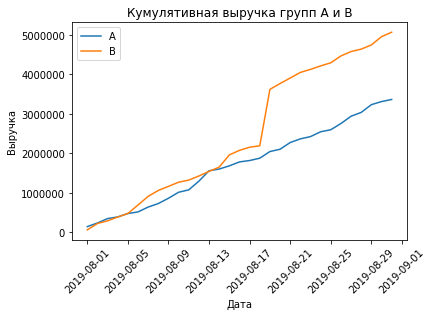

In [23]:
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.title('Кумулятивная выручка групп А и В')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.xticks(rotation=45)
plt.show()

**Вывод**
График кумулятивной выручки группы В растет, однако, в середине теста происходит стремительный рост, почти на порядок. Можно предположить, что пользователи стали совершать более дороги покупки. График группы А увеличивается постепенно, без аномальных значений.  

### Кумулятивный средний чек

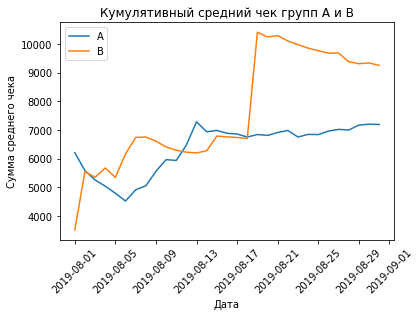

In [24]:
#Постройте график кумулятивного среднего чека по группам
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 
plt.title('Кумулятивный средний чек групп А и В')
plt.xlabel('Дата')
plt.ylabel('Сумма среднего чека')
plt.xticks(rotation=45)
plt.show()

**Вывод**

График кумулятивного среднего чека подтвердил наши предыдущие выводы - в середине теста у пользователей группы В резко выросли траты на покупки.

График группы А имеет выраженный провал в начале теста, затем также идет рост, а затем средний показатель чека стабилизируется.
 

### График относительного изменения кумулятивного среднего чека группы B к группе A

In [25]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

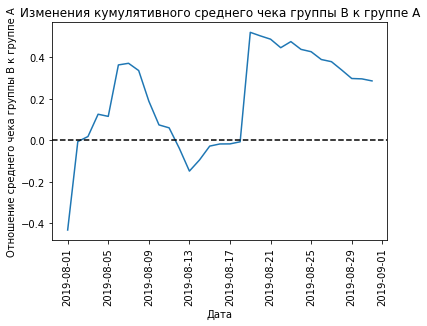

In [26]:
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('Изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Отношение среднего чека группы B к группе A')
plt.xticks(rotation=90)
plt.show()

**Вывод**

Результаты теста значительно менялись несколько раз, видимо, именно тогда были совершенены аномальные заказы.

### График кумулятивной конверсии по группам

In [27]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

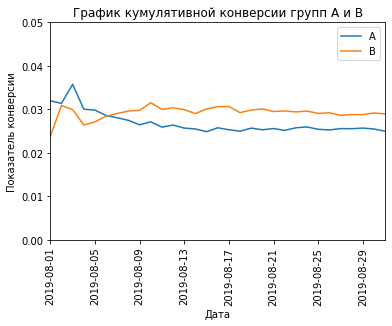

In [28]:
# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
# задаем масштаб осей
plt.axis(['2019-08-01', '2019-08-31', 0, 0.05]) 
plt.title('График кумулятивной конверсии групп А и В')
plt.xlabel('Дата')
plt.ylabel('Показатель конверсии')
plt.xticks(rotation=90)
plt.show()

**Вывод**

Группа А имеет показатель по конверсии ниже, чем группа В практически на протяжении всего теста.

### График относительного изменения кумулятивной конверсии группы B к группе A

In [29]:
# собираем данные в одном датафрейме
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

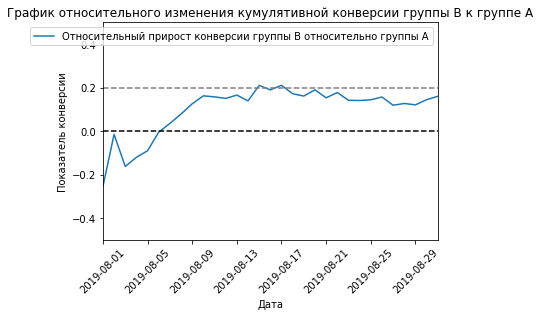

In [30]:
# Постройте график относительного различия кумулятивной конверсии группы B к группе A.
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y= 0.2, color='grey', linestyle='--')
#Задайте масштаб осей
plt.axis(["2019-08-01", '2019-08-31', -0.5, 0.5]) 
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Показатель конверсии')
plt.xticks(rotation=45)
plt.show()

**Вывод**

Хотя конверсия группы В выше, чем у группы А, но прирост заметен только в первой половине теста, а далее он снижается.

### График количества заказов по пользователям. 

In [31]:
#найдем число заказов по пользователям
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

ordersByUsers.columns = ['visitorId', 'transactionId']

print(ordersByUsers.sort_values(by='transactionId', ascending=False).head(10)) 

      visitorId  transactionId
908  3967698036              3
55    249864742              3
478  2108163459              3
687  2988190573              3
890  3908431265              3
138   611059232              3
632  2742574263              3
157   678354126              2
323  1404560065              2
452  1985475298              2


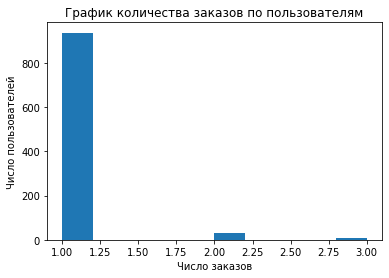

In [32]:
#Построем  график количества заказов по пользователям. 
plt.hist(ordersByUsers['transactionId']) 
plt.title('График количества заказов по пользователям')
plt.xlabel('Число заказов')
plt.ylabel('Число пользователей')
plt.show()

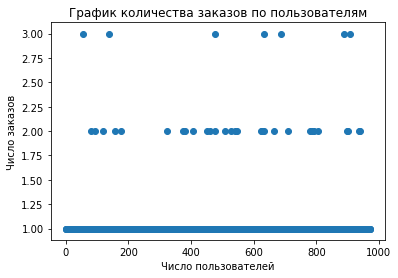

In [33]:
# построим другой тип графика 

x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['transactionId']) 
plt.title('График количества заказов по пользователям')
plt.xlabel('Число пользователей')
plt.ylabel('Число заказов')
plt.show()

### 95-й и 99-й перцентили количества заказов на пользователя

In [34]:
# Посчитайте 95-й и 99-й перцентили количества заказов на пользователя
print(np.percentile(ordersByUsers['transactionId'], [90, 95, 99])) 

[1. 1. 2.]


### График стоимостей заказов

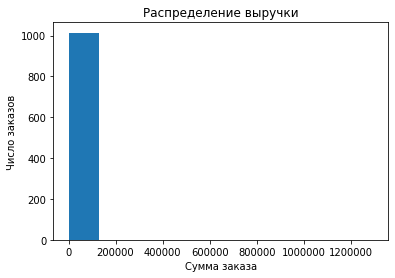

In [35]:
#Построим гистограмму распределения выручек
plt.hist(orders['revenue']) 
plt.title('Распределение выручки')
plt.xlabel('Сумма заказа')
plt.ylabel('Число заказов')
plt.show()

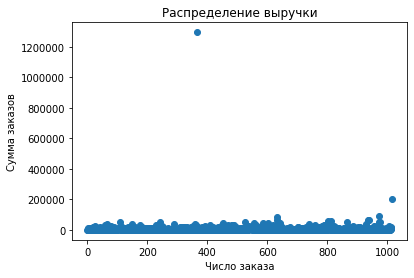

In [36]:
#Построим точечный график стоимостей заказов
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.title('Распределение выручки')
plt.xlabel('Число заказа')
plt.ylabel('Сумма заказов')
plt.show()

**Вывод**

Почти все заказы на сумму до 50 тыс, максимум - до 100 тыс. Однако, найдены и несколько аномальных значений. Также мы помним, что минимальная сумма заказа составляет 50, а максимальная - почти 1,3 млн.

### 95-й и 99-й перцентили стоимости заказов

In [37]:
print(np.percentile(orders['revenue'], [90, 95, 99])) 

[17990. 26785. 53904.]


### Статистическая значимость различий в конверсии между группами по «сырым» данным

In [38]:
#Посчитаем статистическую значимость различий в конверсии и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.
#Начнём с подготовки данных.
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data_raw = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data_raw.head(5)) 

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Мы получили таблицу **data_raw** с "сырыми" данными, которая содержит следующие столбцы:


date — дата;

ordersPerDateA — количество заказов в выбранную дату в группе A;

revenuePerDateA — суммарная выручка в выбранную дату в группе A;

ordersPerDateB — количество заказов в выбранную дату в группе B;

revenuePerDateB — суммарная выручка в выбранную дату в группе B;

ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;

revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;

ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;

revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;

visitorsPerDateA — количество пользователей в выбранную дату в группе A;

visitorsPerDateB — количество пользователей в выбранную дату в группе B;

visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;

visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.


In [39]:
#Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['visitorId', 'transactionId']. 
#В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'transactionId']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'transactionId'] 

In [40]:
#Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. 
sampleA = pd.concat(
    [
        ordersByUsersA['transactionId'],
        pd.Series(
            0,
            index=np.arange(
                data_raw['visitorsPerDateA'].sum() - len(ordersByUsersA['transactionId'])
            ),
            name='transactionId',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['transactionId'],
        pd.Series(
            0,
            index=np.arange(
                data_raw['visitorsPerDateB'].sum() - len(ordersByUsersB['transactionId'])
            ),
            name='transactionId',
        ),
    ],
    axis=0,
)


In [41]:
#проверим выборки на нормальность распределения, с этой задачей справится тест Шапиро
alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(sampleA)
p_value = results[
    1
]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


/opt/conda/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [42]:
#проверим вторую выборку на нормальность распределения,
alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(sampleB)
p_value = results[
    1
]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


**Вывод**

В нашем случа в данных есть большие (по сравнению с нормальным распределением) выбросы, поэтому алгебраические метрики работают плохо.
Для проведения A/B-тестировани выберем метод, основанный на структурном подходе, или непараметрический - st.mannwhitneyu() (от англ. «U-критерий Манна-Уитни»).

**Формулируем гипотезы для проведения теста Манна-Уитни**

Нулевая гипотеза: в конверсии между группами А и В по "сырым" данным нет статистически значимых различий;

Альтернативная гипотеза: в конверсии между группами А и В по "сырым" данным есть статистически значимые различия.

p-value (значение вероятности) зададим в 0.05 или 5%.

***Примечание: H₀ всегда формулируется так, чтобы использовать знак равенства. Другими словами, чтобы все значения, полученные эмпирически, не были экстремальными, а лежали там, где ожидаем их найти. Например, если мы исследуем, не увеличилась ли величина, то нулевая гипотеза будет звучать: «нет, не увеличилась». Если выясняем, есть ли разница между совокупностями, то нулевая гипотеза будет такая: «нет, разницы нет, то есть исследуемые параметры равны».***

In [43]:
#Посчитаем статистическую значимость различия в конверсии между группами
# p-value для сравнения конверсии между группами
print('Значение p-value:', "{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB, True, 'two-sided')[1]))

Значение p-value: 0.01102


In [44]:
#относительное различие в конверсии между группами
print('Относительное изменение конверсии группы B к группе А:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

Относительное изменение конверсии группы B к группе А: 0.160


 ### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

**Формулируем гипотезы для проведения теста Манна-Уитни**

Нулевая гипотеза: в среднем чеке между группами А и В по "сырым" данным нет статистически значимых различий;

Альтернативная гипотеза: в среднем чеке между группами А и В по "сырым" данным есть статистически значимые различия.

p-value (значение вероятности) зададим в 0.05 или 5%.

In [45]:
#p-value для сравнения средних чеков между группами
print('Значение p-value:','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], True, 'two-sided')[1]))

Значение p-value: 0.829


In [46]:
#относительный прирост среднего чека группы B
print('Относительное изменение среднего чека группы B к группе А:','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

Относительное изменение среднего чека группы B к группе А: 0.287


### Статистическая значимость различий в конверсии между группами по «очищенным» данным

In [47]:
# Сделаем срез и уберем данные по аномальным пользователям
#ранее мы посчитали, что такими можно считать пользователей, сделавших более 2 заказов, на сумму свыше 26 тыс.
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['transactionId'] > 3]['visitorId'],
        ordersByUsersB[ordersByUsersB['transactionId'] > 3]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 26000]['visitorId']
ab_normal_users = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
ab_normal_users.head(5)

568     113298937
1099    148427295
461     154576532
928     204675465
684     358944393
Name: visitorId, dtype: int64

In [48]:
# создадим переменные sampleAFiltered и sampleBFiltered,
# в которых сохраните очищенные данные о заказах — не включая аномальных пользователей.
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(ab_normal_users))
        ]['transactionId'],
        pd.Series(
            0,
            index=np.arange(
                data_raw['visitorsPerDateA'].sum() - len(ordersByUsersA['transactionId'])
            ),
            name='transactionId',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(ab_normal_users))
        ]['transactionId'],
        pd.Series(
            0,
            index=np.arange(
                data_raw['visitorsPerDateB'].sum() - len(ordersByUsersB['transactionId'])
            ),
            name='transactionId',
        ),
    ],
    axis=0,
) 

In [49]:
#проверим выборки на нормальность распределения, с этой задачей справится тест Шапиро
alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(sampleAFiltered)
p_value = results[
    1
]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


In [50]:
#проверим вторую выборку на нормальность распределения,
alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(sampleBFiltered)
p_value = results[
    1
]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


**Вывод**

В нашем случа в данных есть большие (по сравнению с нормальным распределением) выбросы, поэтому алгебраические метрики работают плохо.
Для проведения A/B-тестировани выберем метод, основанный на структурном подходе, или непараметрический - st.mannwhitneyu() (от англ. «U-критерий Манна-Уитни»).

**Формулируем гипотезы для теста Манна-Уитни**

Нулевая гипотеза: в конверсии между группами А и В по очищенным данным нет статистически значимых различий;

Альтернативная гипотеза: в конверсии между группами А и В по очищенным данным есть статистически значимые различия.

p-value (значение вероятности) зададим в 0.05 или 5%.


In [51]:
# p-value для сравнения конверсии между очищенными группами
print('Значение p-value:', '{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, True, 'two-sided')[1]))

Значение p-value: 0.01814


In [52]:
#  относительный прирост конверсии очищенной группы B
print('Относительное изменение конверсии группы B к группе А:', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

Относительное изменение конверсии группы B к группе А: 0.154


### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

**Формулируем гипотезы**

Нулевая гипотеза: в среднем чеке между группами А и В по очищенным данным нет статистически значимых различий;

Альтернативная гипотеза: в среднем чеке между группами А и В по очищенным данным есть статистически значимые различия.

p-value (значение вероятности) зададим в 0.05 или 5%.

In [53]:
# p-value для сравнения средних чеков между очищенными группами
print('Значение p-value:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(ab_normal_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(ab_normal_users)),
                )
            ]['revenue'],  True, 'two-sided'
        )[1]
    )
)

Значение p-value: 0.708


In [54]:
# относительный прирост среднего чека очищенной группы B
print('Относительное изменение среднео чека группы B к группе А:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(ab_normal_users)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(ab_normal_users)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

Относительное изменение среднео чека группы B к группе А: -0.060


## Выводы по результатам теста

1. Есть статистически значимое различие по конверсии между группами и по «сырым», и по данным после фильтрации аномалий - группа В лучше конвертируется примерно на 16%;

2. Нет статистически значимого различия по среднему чеку между группами - если убрать аномальные данные, то эти показатели примерно равны в обеих группах;

3. График различия конверсии между группами сообщает, что результаты группы B лучше группы A, однако есть тенденция к снижению этого показателя;

4. График различия среднего чека говорит о том, что результаты группы B были не стабильны в течение всего периода проведения теста - в группе В он-то был на 15% хуже, чем у группы А, то сразу на 50% лучше. 

5. Исходя из обнаруженных фактов, можно сделать вывод, что показатель конверсии лучше у группы В. Однако, эта группа более рискованная, если нужно сделать прогноз по показателю среднего чека - на данные оказывают большое влияние аномальные показателии и разброс сумм заказа, который варьируется от 50 до 1,3 млн. Вероятно, тест нужно останосить и скорректировать исходные сегменты. 